# Deep Learning Project (CNN) - MNIST-Fashion Classification

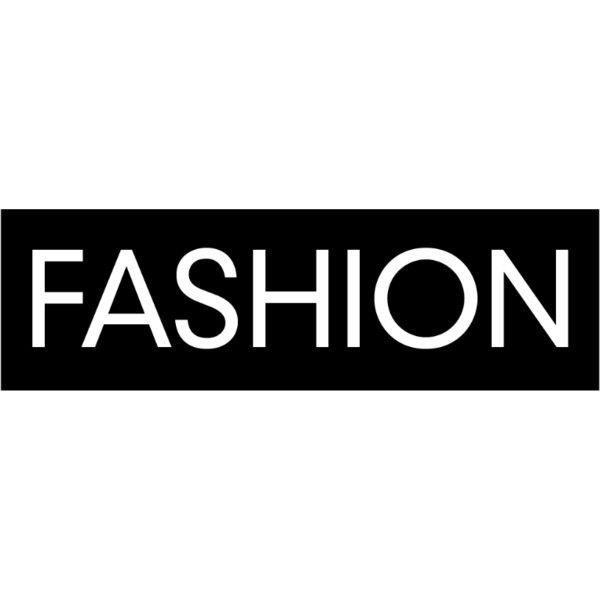

# Context
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

# Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top,
1 Trouser,
2 Pullover,
3 Dress,
4 Coat,
5 Sandal,
6 Shirt,
7 Sneaker,
8 Bag,
9 Ankle boot.


# Importing the Libraries

In [4]:
!pip install keras

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

# Load the Dataset

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [7]:
X_train.shape, y_train.shape
 
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
y_train[0]

9

In [19]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

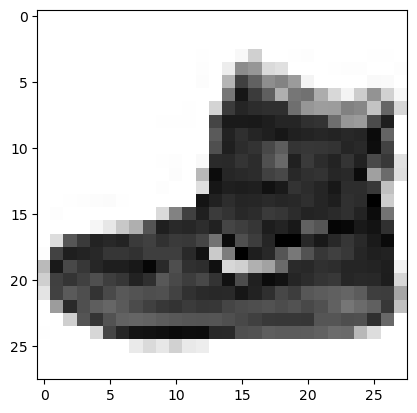

In [20]:
plt.imshow(X_train[0], cmap ="Greys")

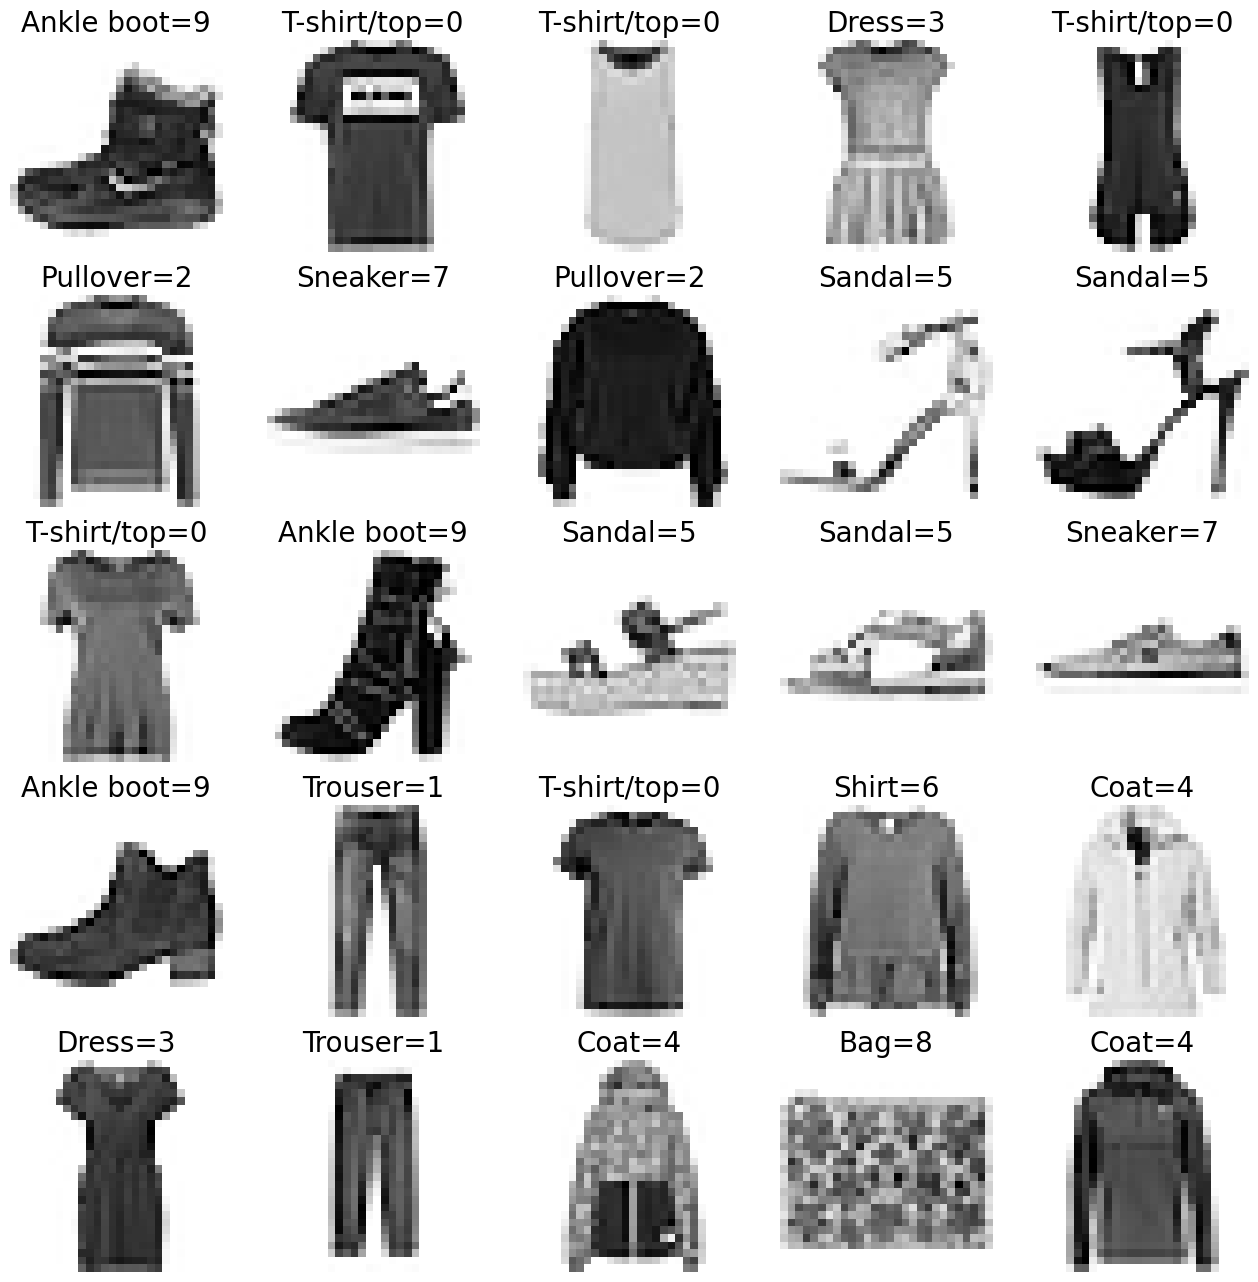

In [21]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

# Feature Scalling

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Build Neural Network

In [25]:
model = keras.models.Sequential([
                         keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(units=32, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
!pip install visualkeras

     ---------------------------------------- 44.9/44.9 kB 2.2 MB/s eta 0:00:00


In [47]:
import visualkeras

In [48]:
visualkeras.layered_view(model)

In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=1)
 
model.fit(X_train, y_train, epochs=10)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5494 - accuracy: 0.8103
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4150 - accuracy: 0.8524
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3817 - accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3601 - accuracy: 0.8695
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3447 - accuracy: 0.8750
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3344 - accuracy: 0.8794
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3232 - accuracy: 0.8831
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3158 - accuracy: 0.8840
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3086 - accuracy: 0.8871
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3011 - accuracy

# Test and Evaluate Neural Network Model

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3728 - accuracy: 0.8677


[0.37280648946762085, 0.8676999807357788]

In [30]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [31]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
      dtype=float32)

In [32]:
np.argmax(y_pred[0].round(2))

9

In [33]:
y_test[0]

9

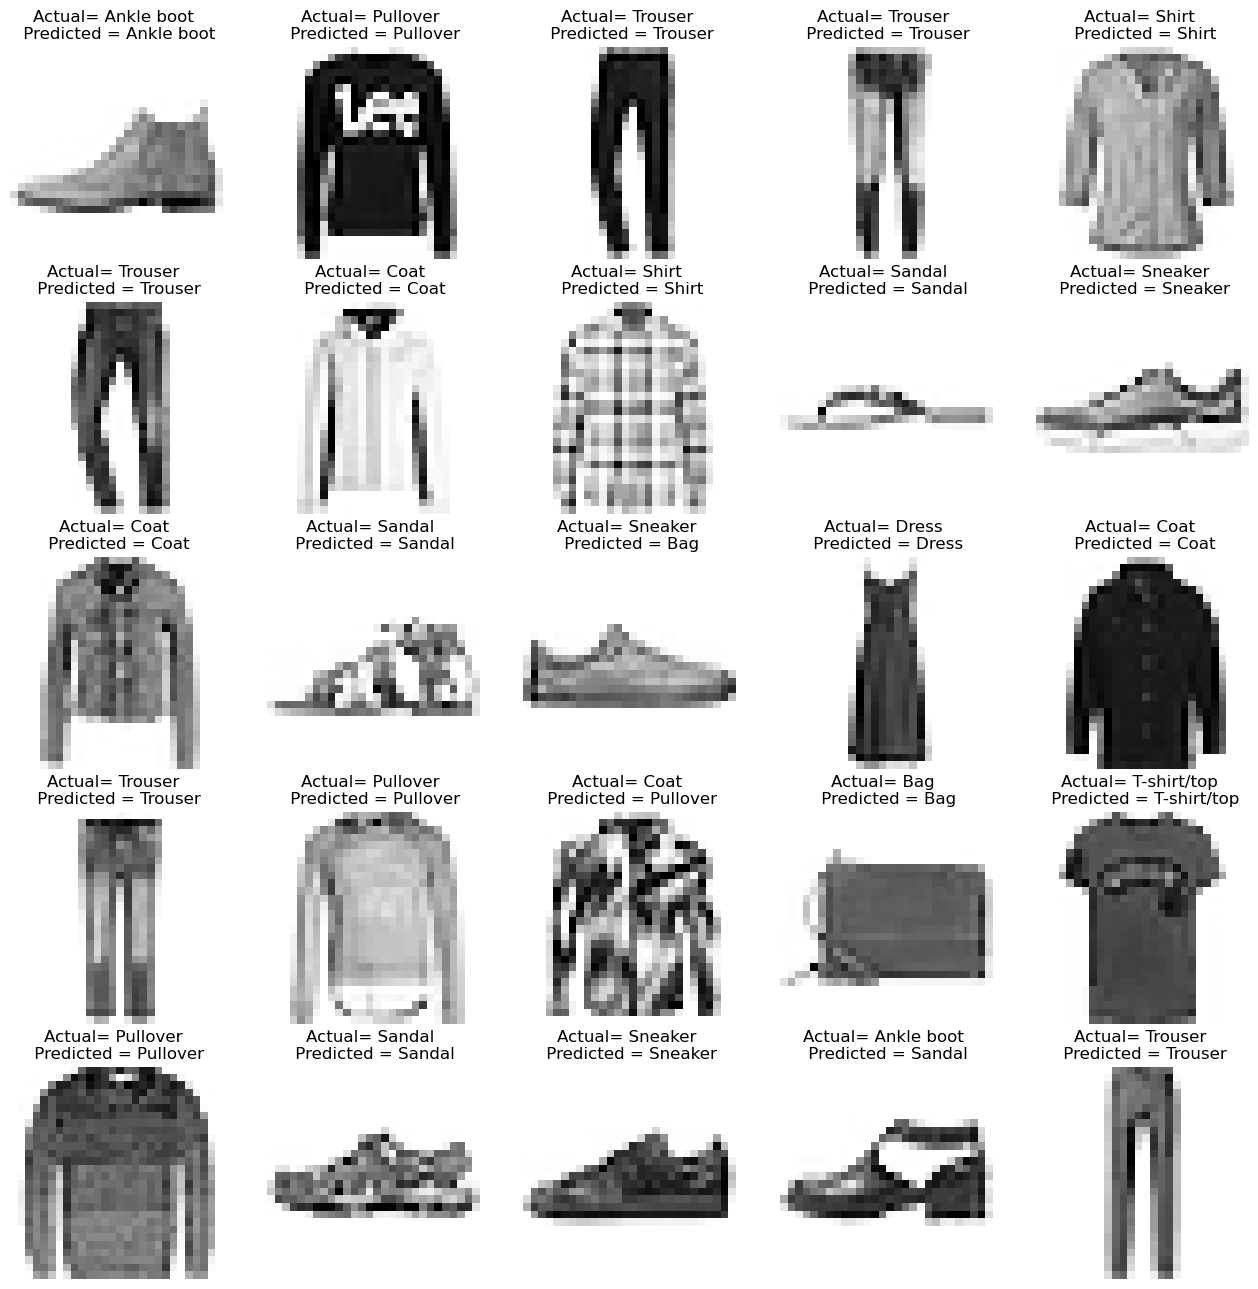

In [34]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

# Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [ np.argmax(i) for i in y_pred])

<Axes: >

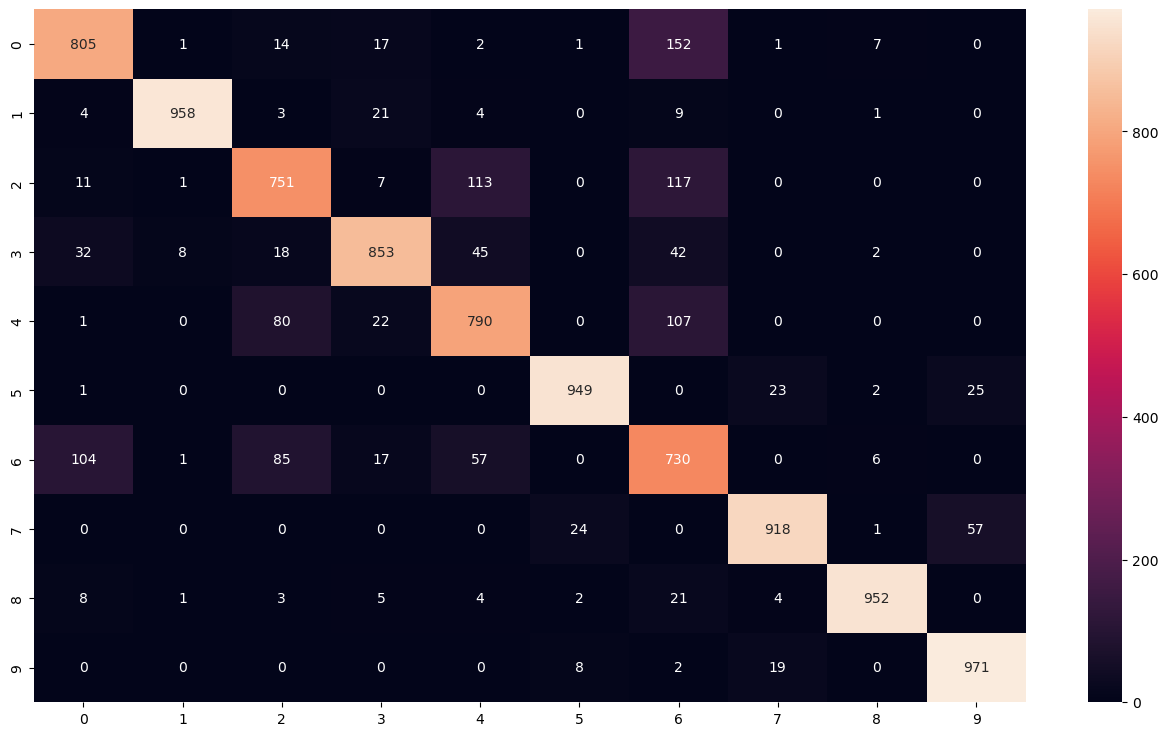

In [36]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt = "d")

# Classification Report

In [37]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [ np.argmax(i) for i in y_pred], target_names = class_labels,)

In [38]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.81      0.82      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.79      0.75      0.77      1000
       Dress       0.91      0.85      0.88      1000
        Coat       0.78      0.79      0.78      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.62      0.73      0.67      1000
     Sneaker       0.95      0.92      0.93      1000
         Bag       0.98      0.95      0.97      1000
  Ankle boot       0.92      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Save Model

In [40]:
model.save("MNIST_classifier")
 
model = keras.models.load_model("MNIST_classifier")
 
model.predict(X_test)

INFO:tensorflow:Assets written to: MNIST_classifier\assets


INFO:tensorflow:Assets written to: MNIST_classifier\assets


313/313 [==============================] - 1s 3ms/step


array([[4.6329787e-06, 7.1169701e-08, 4.2404093e-08, ..., 1.3161332e-02,
        1.6502719e-04, 9.8238420e-01],
       [4.5421115e-05, 8.2542756e-13, 9.8256153e-01, ..., 3.2595098e-15,
        2.7550989e-08, 9.3940810e-21],
       [1.1663253e-05, 9.9998426e-01, 3.4556003e-06, ..., 1.4249225e-16,
        5.1817939e-10, 3.0064558e-13],
       ...,
       [7.6385599e-04, 6.0567555e-09, 6.3730957e-04, ..., 4.1717412e-09,
        9.9808961e-01, 2.4338412e-10],
       [2.9058726e-06, 9.9974304e-01, 1.8298930e-05, ..., 1.1162411e-11,
        2.4653000e-08, 3.1834986e-07],
       [1.1010231e-05, 3.2012792e-08, 4.4274921e-06, ..., 1.3556100e-03,
        1.6903572e-04, 3.3954982e-06]], dtype=float32)